.. meta::
   :description: An implementation of AGE-MOEA algorithm to solve many-objective optimization problems without using on reference directions. The algorithm estimates the shape of the Pareto front to provide a better way to compute proximity to ideal point and crowding distance compared to NSGA-II.

.. meta::
   :keywords: AGEMOEA, NSGA-II, Non-Dominated Sorting, Multi-objective Optimization, Python

# AGE-MOEA: Adaptive Geometry Estimation based MOEA

This algorithm is based on <cite data-cite="agemoea"></cite> and its matlab implementation of the PlatEMO library. The algorithm follows the general
outline of [NSGA-II](./nsga2.ipynb) but with a modified crowding distance formula. In AGE-MOEA, fronts are sorted using the non-dominated sorting procedure. Then the first front is used for normalization of the objective space and estimation of Pareto front geometry. The `p` parameter of a Minkowski p-norm is estimated using the closest solution from the middle of the first front. The p-norm is then used to compute a survival score that combines distance from the neighbors and proximity to the ideal point.

As similarily done in NSGA-II, AGE-MOEA uses a binary tournament mating selection to increase some selection pressure. Each individual is first compared using the rank and then the computed score that represent both proximity and spread.

### Example

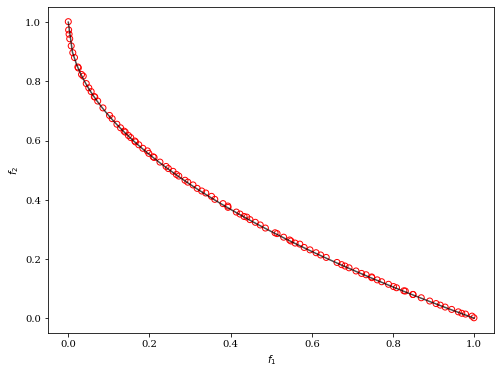

In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()



Moreover, we can customize AGE-MOEA to solve a problem with binary decision variables, for example, ZDT5.

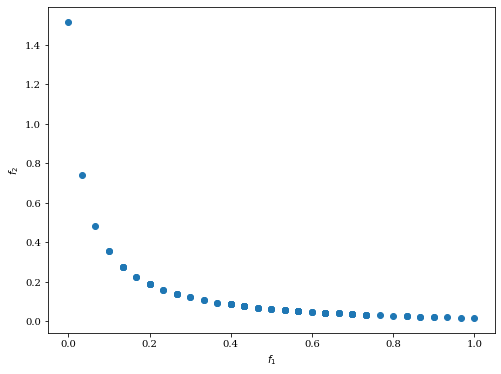

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("bin_random"),
                  crossover=get_crossover("bin_two_point"),
                  mutation=get_mutation("bin_bitflip"),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)


Scatter().add(res.F).show()



### API

This algorithm was ported from the PlatEMO implementation by Ben CRULIS.